<a href="https://colab.research.google.com/github/diogobertozi/IA/blob/main/TrabalhoIA3_Manu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn scikit-learn --quiet

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


Primeiro carregamos o dataset e fazemos uma analise inicial para testes

In [ ]:
# Carregando o dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame


🔹 Primeiras linhas do dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

🔹 Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64

<ipython-input-20-564d772cc818>:16: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


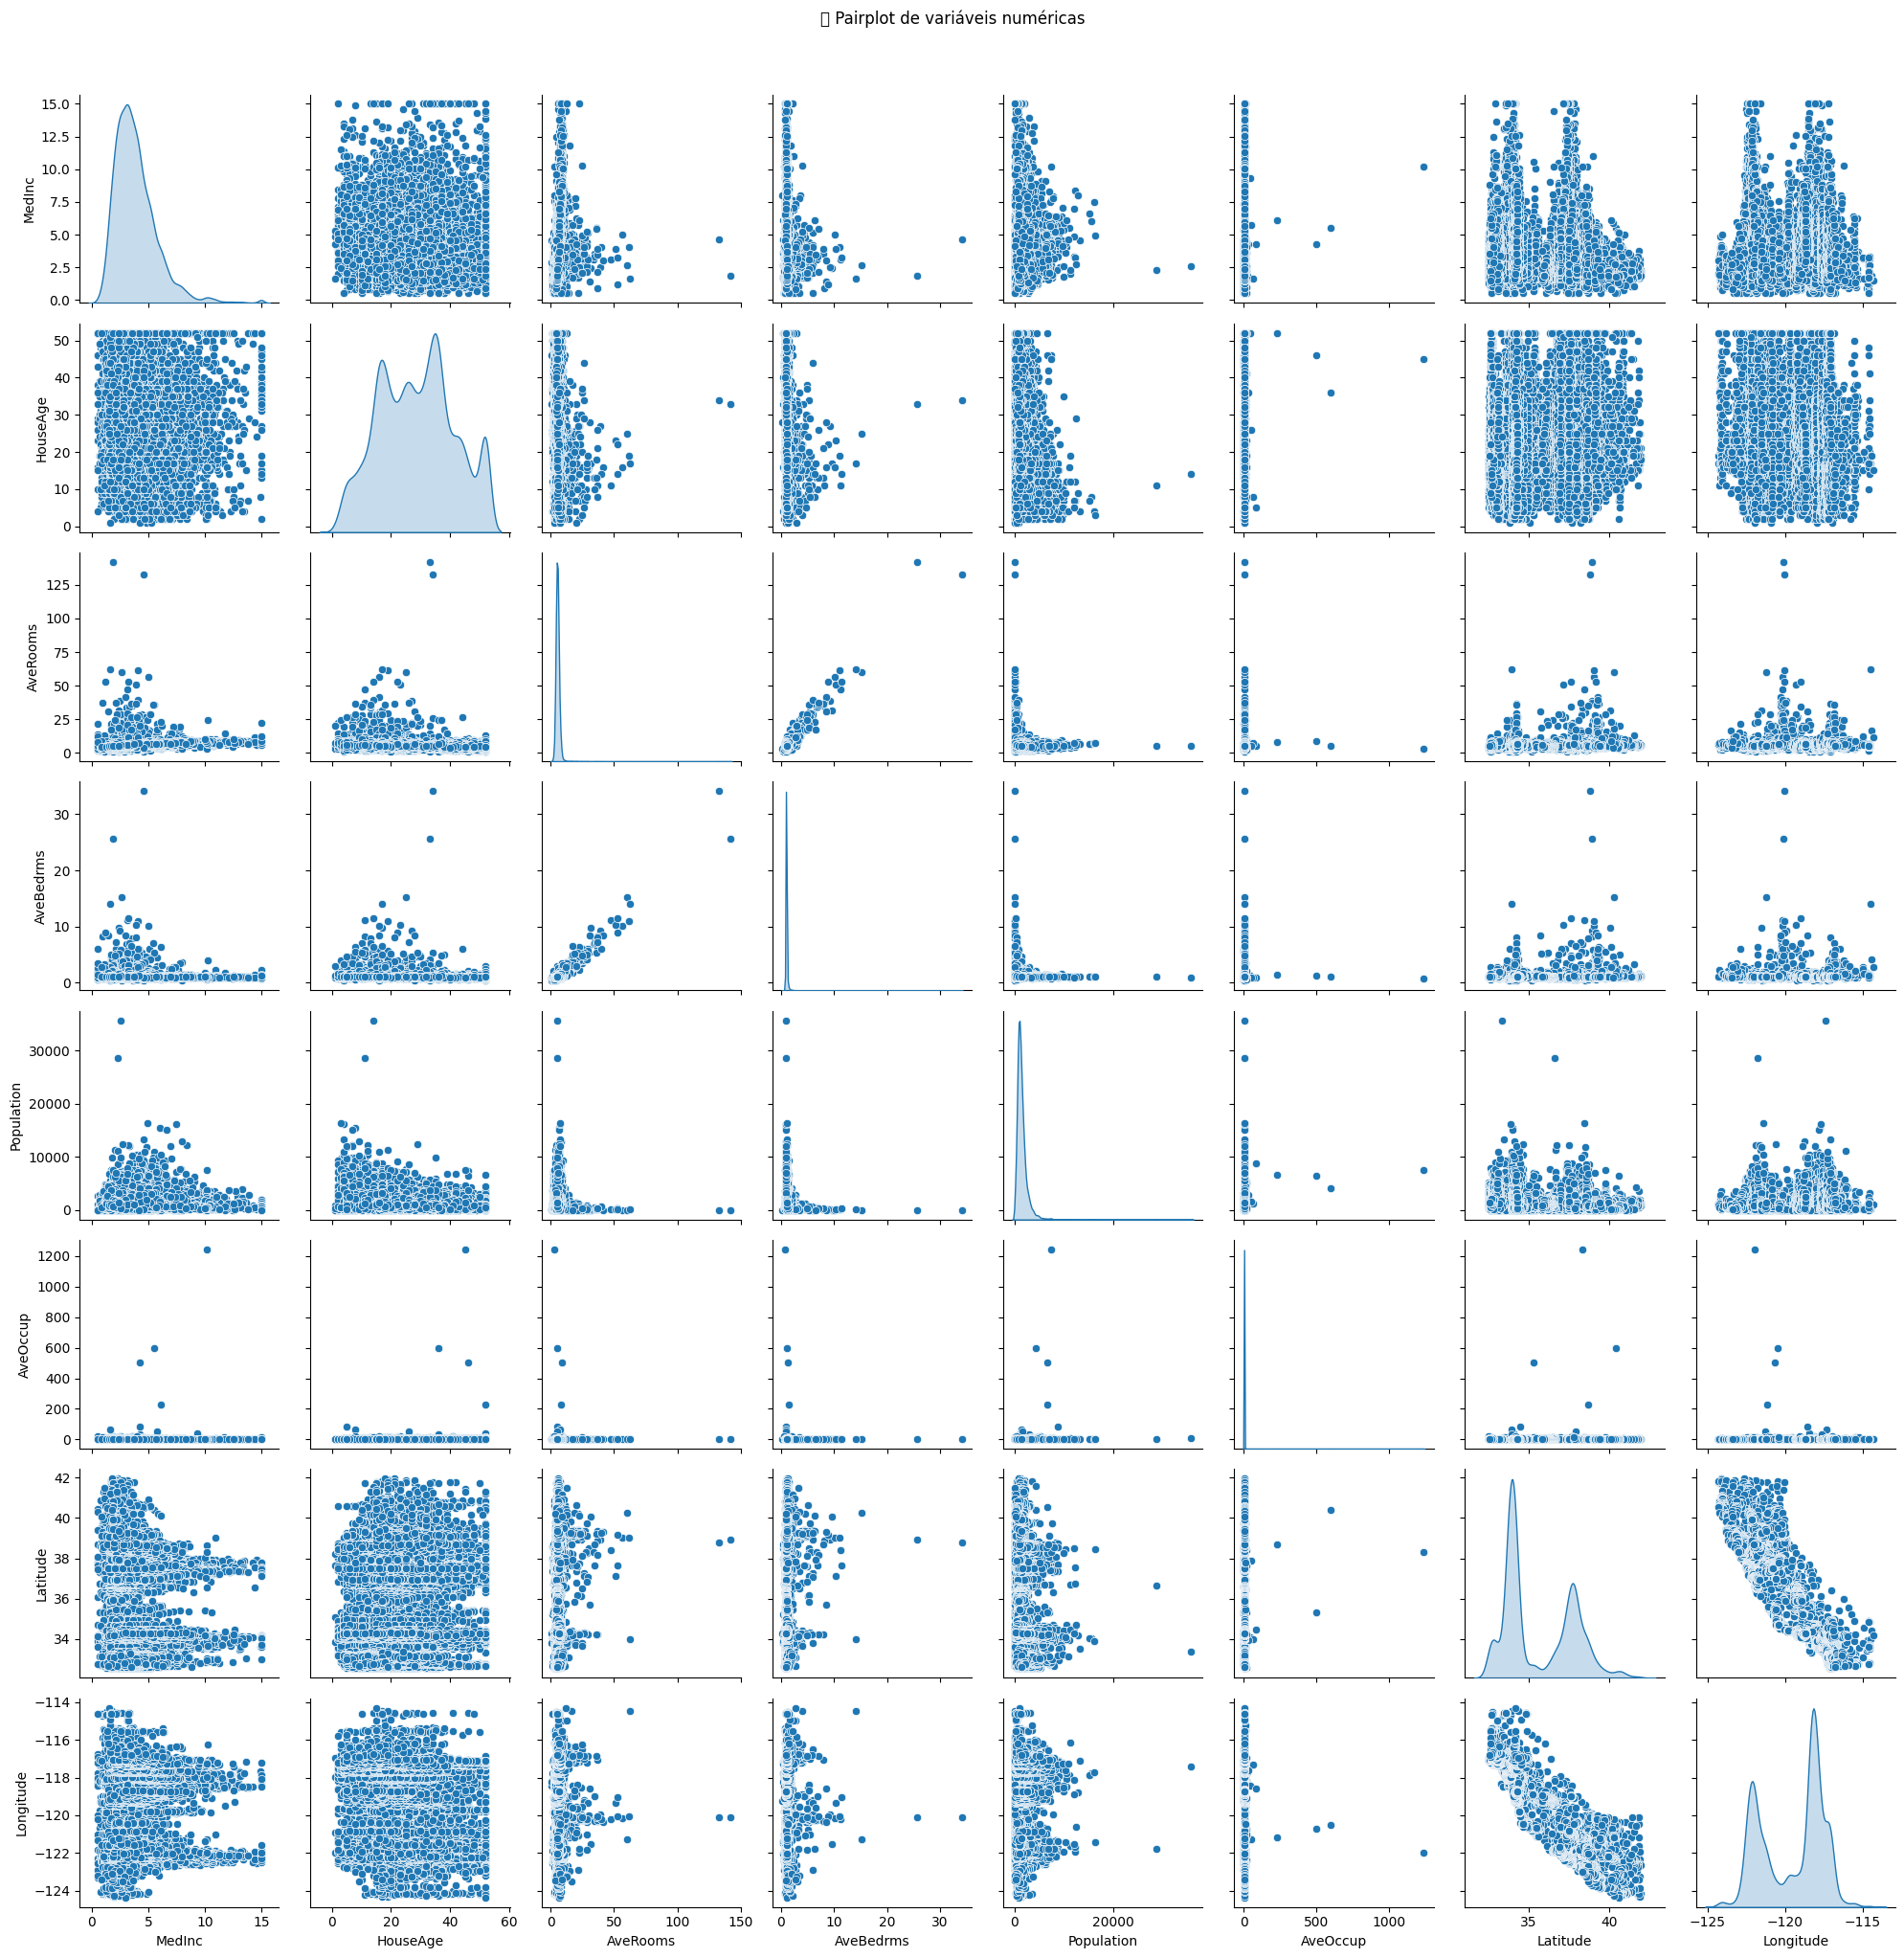

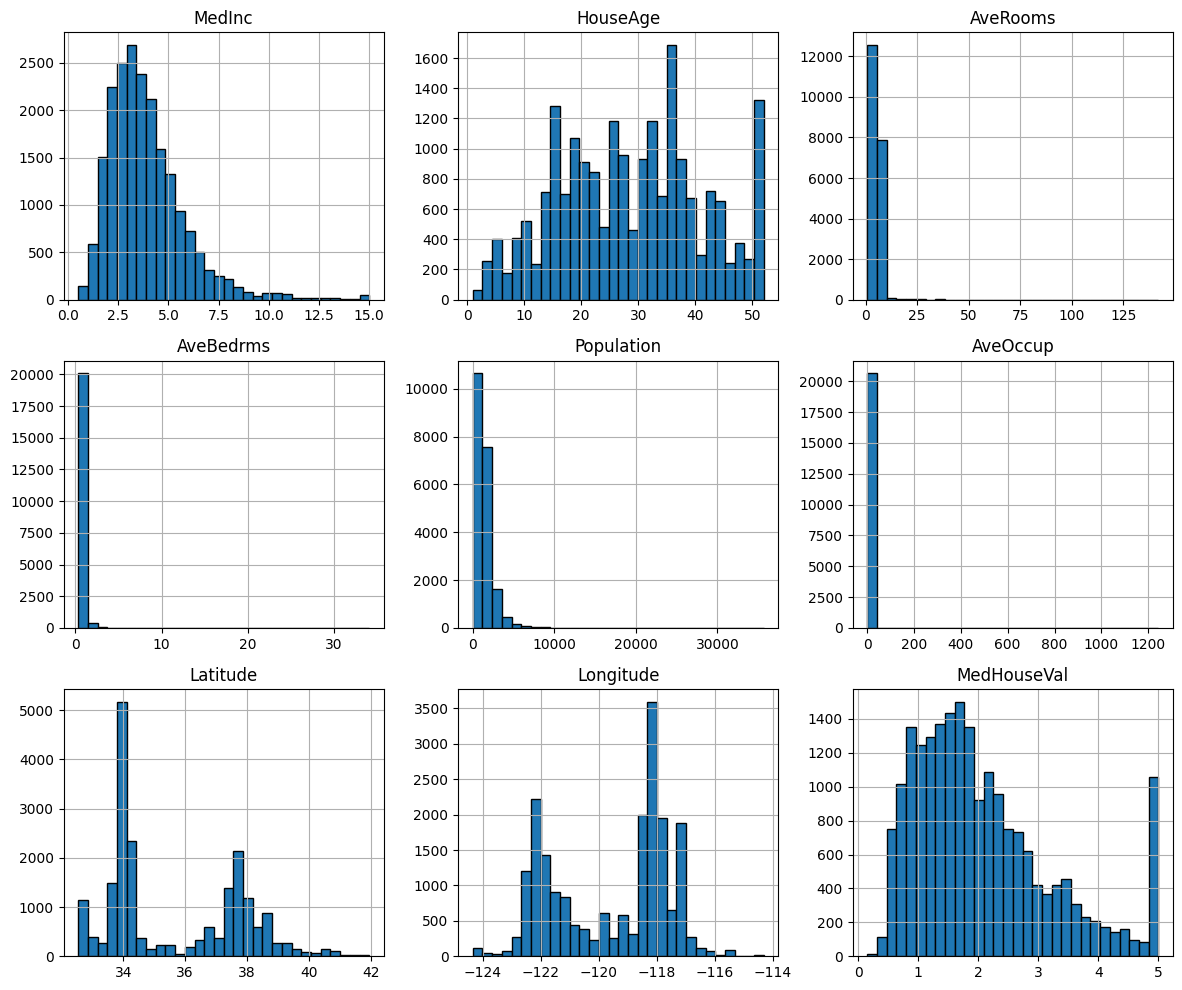

In [ ]:
print("🔹 Primeiras linhas do dataset:")
print(df.head())


print("\n🔹 Informações do dataset:")
print(df.info())


# Estatísticas descritivas
print("\n🔹 Estatísticas descritivas:")
print(df.describe())

# Pairplot de algumas variáveis
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','Latitude','Longitude']], diag_kind="kde")
plt.suptitle("🔍 Pairplot de variáveis numéricas", y=1.02)
plt.tight_layout()
plt.show()

df.hist(bins=30, figsize=(12, 10), edgecolor='black')
plt.tight_layout()
plt.show()


Vemos que temos apenas colunas numéricas, não temos valores nulos e aparentemente temos uma quantidade considerável de outliers que podem atrapalhar a análise

In [ ]:
# =============================================
# Remoção de outliers com base em percentis
# =============================================

# Mostrar shape original
print("\nShape original antes da remoção de outliers:", df.shape)

# Lista de colunas preditoras (excluindo a variável alvo)
cols = df.columns.drop('MedHouseVal')

# Loop para remover outliers extremos (abaixo do 1% e acima do 99%) de cada coluna
for col in cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Mostrar novo shape após limpeza
print("Shape após remoção de outliers:", df.shape)

# Comentário explicativo para o relatório:
# "Foram removidos os valores extremos (outliers) com base nos percentis 1% e 99% das variáveis preditoras,
# com o objetivo de reduzir distorções nos gráficos e melhorar a performance dos algoritmos de regressão aplicados posteriormente."


Shape original antes da remoção de outliers: (20640, 9)
Shape após remoção de outliers: (17817, 9)


<ipython-input-22-a08fe997563c>:4: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


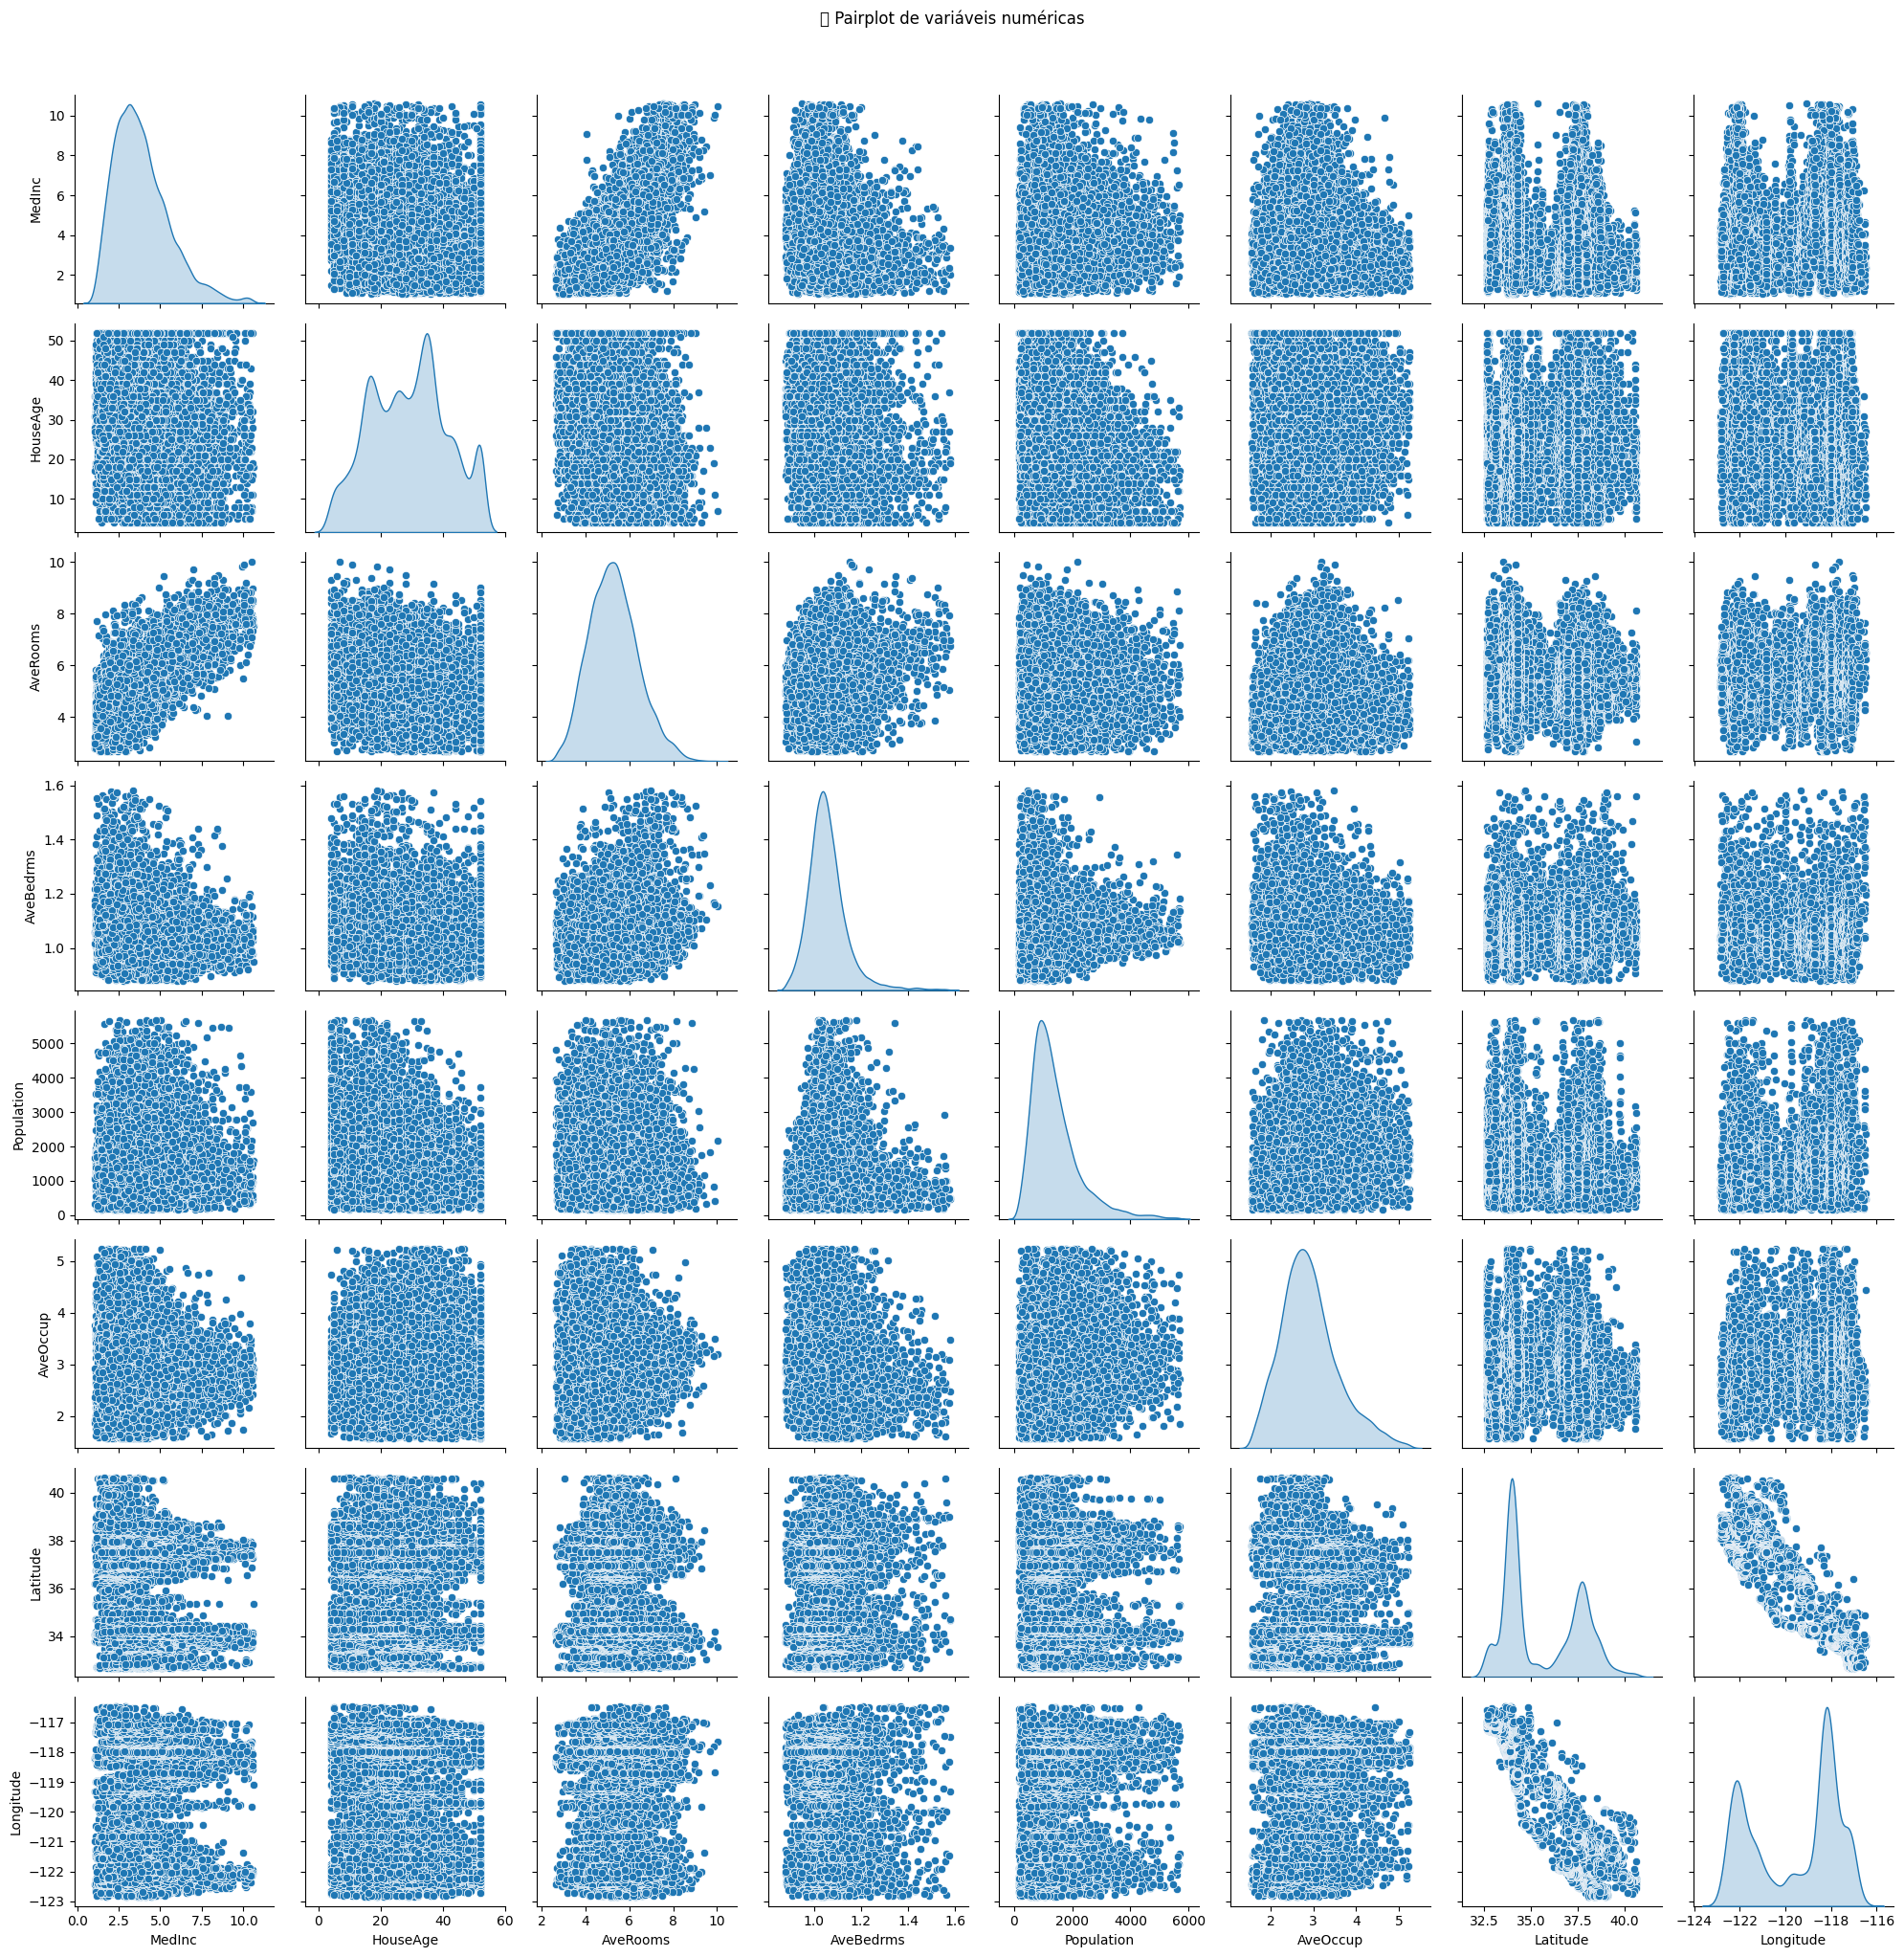

In [ ]:
# Pairplot de algumas variáveis
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','Latitude','Longitude']], diag_kind="kde")
plt.suptitle("🔍 Pairplot de variáveis numéricas", y=1.02)
plt.tight_layout()
plt.show()


analise
MedInc × AveRooms: relação positiva visível. Rendas maiores tendem a vir de casas com mais cômodos médios.

MedInc × AveOccup: leve correlação negativa – renda tende a ser menor quando há mais pessoas por casa.

Sem correlações claras. A idade média das casas parece não estar fortemente ligada às demais variáveis aqui.



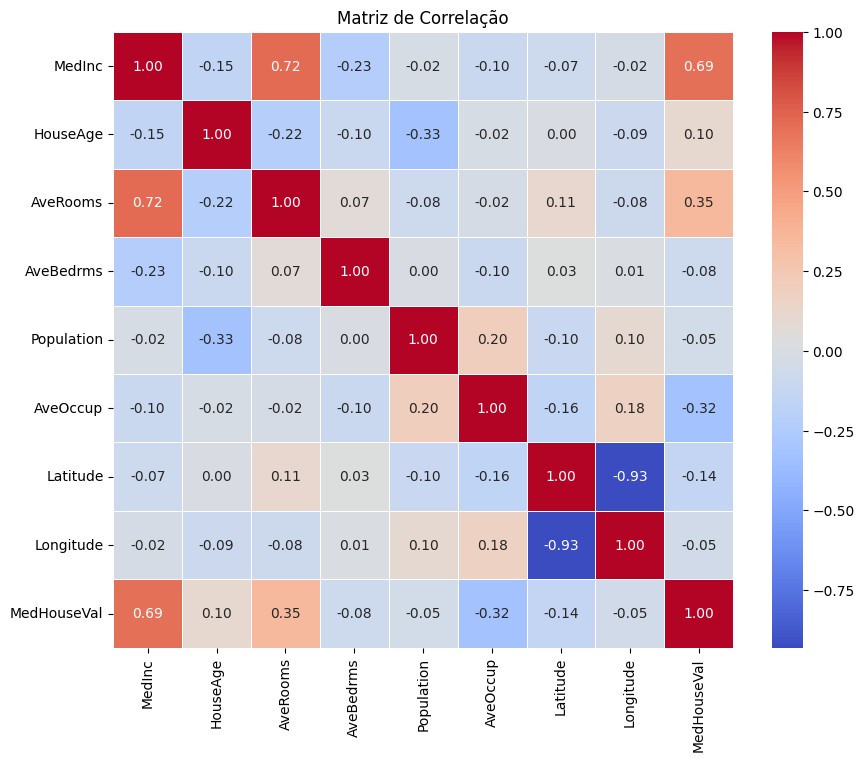

MedHouseVal    1.000000
MedInc         0.692871
AveRooms       0.350284
HouseAge       0.103985
Population    -0.048107
Longitude     -0.052364
AveBedrms     -0.077701
Latitude      -0.136822
AveOccup      -0.320599
Name: MedHouseVal, dtype: float64

In [ ]:
# Calcula a matriz de correlação
corr_matrix = df.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

df.corr(numeric_only=True)['MedHouseVal'].sort_values(ascending=False)


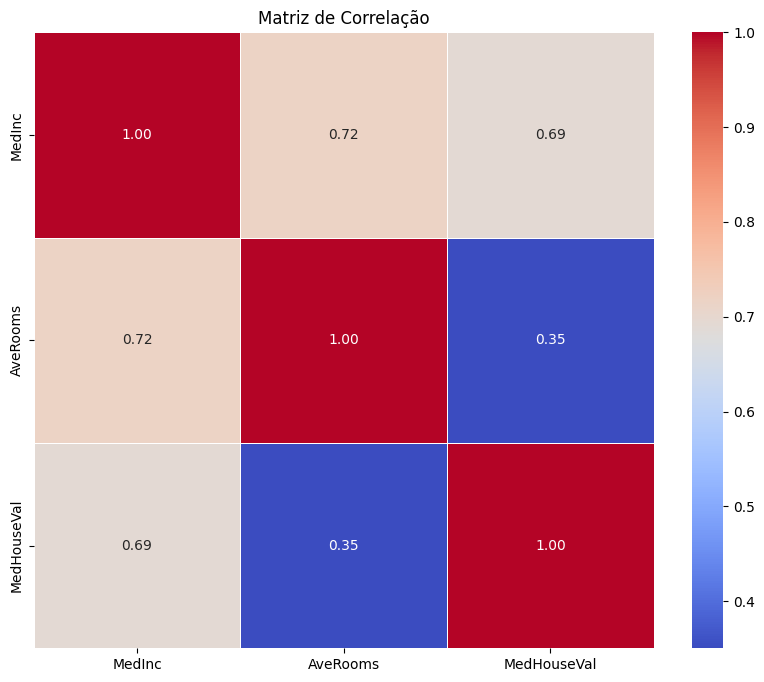

MedHouseVal    1.000000
MedInc         0.692871
AveRooms       0.350284
Name: MedHouseVal, dtype: float64

In [ ]:
# Mantendo apenas as colunas mais relevantes
df = df[['MedInc', 'AveRooms', 'MedHouseVal']]

# df = df.columns.drop('MedHouseVal', 'HouseAge', 'Population','AveOccup','Latitude')

# Calcula a matriz de correlação
corr_matrix = df.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

df.corr(numeric_only=True)['MedHouseVal'].sort_values(ascending=False)


Divide os dados em treino (80%) e teste (20%).

Treina um modelo de regressão linear com os dados de treino.

Faz previsões com os dados de teste.

Calcula dois indicadores importantes:

MSE (Erro Quadrático Médio): quanto menor, melhor.

R² (coeficiente de determinação): mostra o quão bem o modelo explica os dados (quanto mais próximo de 1, melhor).

In [ ]:
# Separar X e y
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonamento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("🔵 Regressão Linear:")
print(f"R²: {r2_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"MSE: {mse_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")


🔵 Regressão Linear:
R²: 0.5206
MAE: 0.5894
MSE: 0.6354
RMSE: 0.7971


<ipython-input-27-7d473c66ed2d>:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


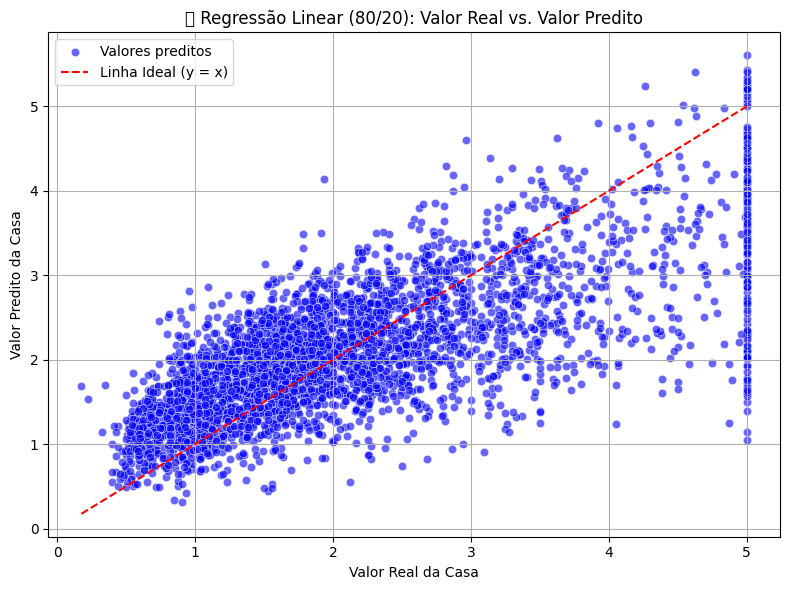

In [ ]:
# Assumindo que y_test e y_pred são da Regressão Linear
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6, color='blue', label='Valores preditos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Linha Ideal (y = x)')
plt.xlabel("Valor Real da Casa")
plt.ylabel("Valor Predito da Casa")
plt.title("📊 Regressão Linear (80/20): Valor Real vs. Valor Predito")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Carregando o dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Lista de colunas preditoras (excluindo a variável alvo)
cols = df.columns.drop('MedHouseVal')

# Remoção de outliers extremos: abaixo de 1% e acima de 99% para cada coluna preditora
for col in cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Criação da feature geográfica: distância ao centro da Califórnia (Latitude 36.77, Longitude -119.41)
lat_center, lon_center = 36.77, -119.41
lat = np.radians(df['Latitude'])
lon = np.radians(df['Longitude'])
lat0 = np.radians(lat_center)
lon0 = np.radians(lon_center)
dlat = lat - lat0
dlon = lon - lon0

a = np.sin(dlat/2)**2 + np.cos(lat) * np.cos(lat0) * np.sin(dlon/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
df['DistToCenter'] = 6371 * c  # Distância em km (Haversine)

# Seleção final das colunas para KNN
df_knn = df[['MedInc', 'AveRooms', 'HouseAge', 'DistToCenter', 'MedHouseVal']].copy()

# Verificação rápida
print(df_knn.head())


   MedInc  AveRooms  HouseAge  DistToCenter  MedHouseVal
0  8.3252  6.984127      41.0    278.210810        4.526
1  8.3014  6.238137      21.0    276.466561        3.585
2  7.2574  8.288136      52.0    277.589368        3.521
3  5.6431  5.817352      52.0    278.386871        3.413
4  3.8462  6.281853      52.0    278.386871        3.422


In [ ]:
# Separar variáveis
X = df_knn.drop(columns='MedHouseVal')
y = df_knn['MedHouseVal']

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Escalando e convertendo de volta para DataFrame com colunas
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns, index=X_test.index)

# Treinamento e predição
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


In [ ]:
# 🧠 8. KNN Regressor (K=5 como exemplo inicial)

# 📊 Métricas KNN
r2_knn = r2_score(y_test, y_pred)
mae_knn = mean_absolute_error(y_test, y_pred)
mse_knn = mean_squared_error(y_test, y_pred)
rmse_knn = np.sqrt(mse_knn)

print("\n🟢 KNN Regressor:")
print(f"R²: {r2_knn:.4f}")
print(f"MAE: {mae_knn:.4f}")
print(f"MSE: {mse_knn:.4f}")
print(f"RMSE: {rmse_knn:.4f}")


🟢 KNN Regressor:
R²: 0.6022
MAE: 0.5152
MSE: 0.5264
RMSE: 0.7256


Po ambos poderiam melhorar, mas a  REGRESSAO saiu melhor

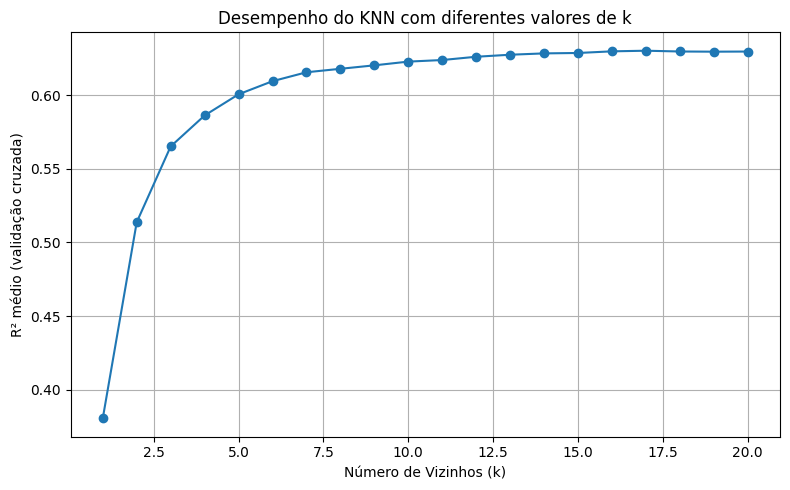

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('R² médio (validação cruzada)')
plt.title('Desempenho do KNN com diferentes valores de k')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-32-c957030bdc1b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelos, y=valores_r2, palette="Blues_d")
<ipython-input-32-c957030bdc1b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelos, y=valores_mae, palette="Oranges_r")
<ipython-input-32-c957030bdc1b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelos, y=valores_rmse, palette="Greens_r")


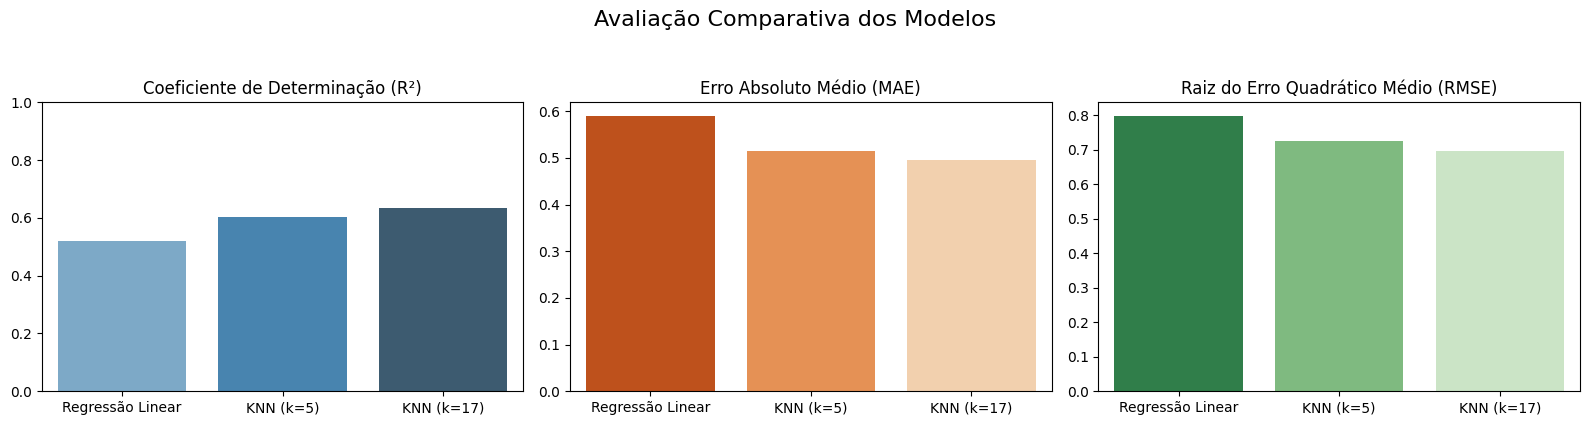

In [ ]:
# Métricas de desempenho para cada modelo testado
modelos = ['Regressão Linear', 'KNN (k=5)', f'KNN (k=5)']
valores_r2 = [r2_lr, r2_knn_5, r2_knn]
valores_mae = [mae_lr, mae_knn_5, mae_knn]
valores_rmse = [rmse_lr, rmse_knn_5, rmse_knn]

# Criação dos gráficos comparativos
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.barplot(x=modelos, y=valores_r2, palette="Blues_d")
plt.title("Coeficiente de Determinação (R²)")
plt.ylim(0, 1)

plt.subplot(1, 3, 2)
sns.barplot(x=modelos, y=valores_mae, palette="Oranges_r")
plt.title("Erro Absoluto Médio (MAE)")

plt.subplot(1, 3, 3)
sns.barplot(x=modelos, y=valores_rmse, palette="Greens_r")
plt.title("Raiz do Erro Quadrático Médio (RMSE)")

plt.suptitle("Avaliação Comparativa dos Modelos", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()
